In [65]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
data_dir = "C:\\Users\\asaia\\OneDrive\\Desktop\\SVM_1\\leapGestRecog"  
img_size = (64, 64)
batch_size = 32

In [67]:
train_ds = image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42
)
val_ds = image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42
)
class_names = train_ds.class_names
num_classes = len(class_names)

Found 20000 files belonging to 10 classes.
Using 16000 files for training.
Found 20000 files belonging to 10 classes.
Using 4000 files for validation.


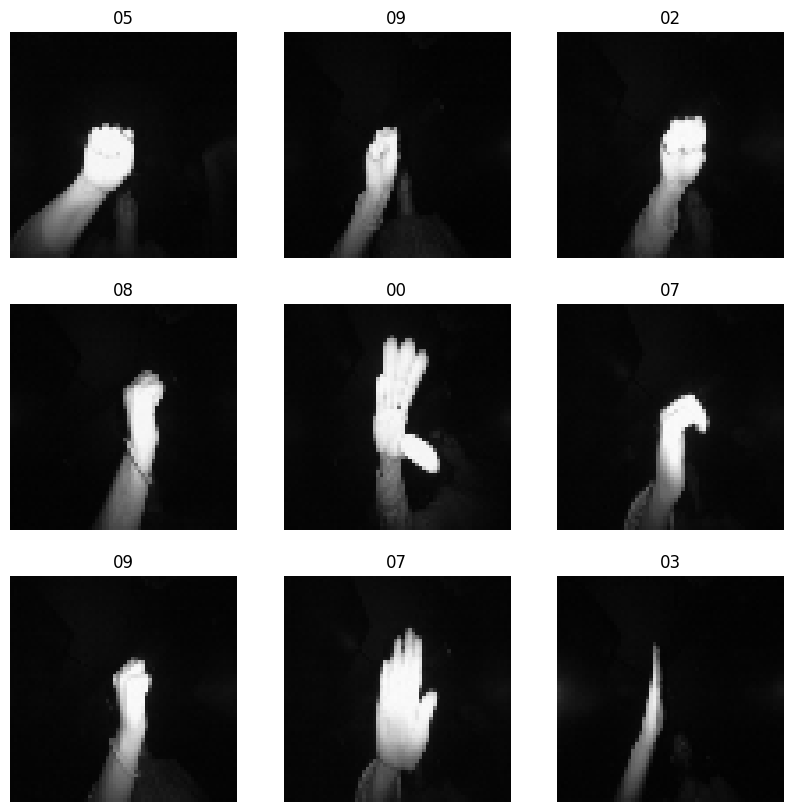

In [68]:
# Display sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

In [69]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

c:\Users\asaia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.6011 - loss: 3.7475 - val_accuracy: 0.9847 - val_loss: 0.0454
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9472 - loss: 0.1437 - val_accuracy: 0.9902 - val_loss: 0.0157
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.9741 - loss: 0.0748 - val_accuracy: 0.9898 - val_loss: 0.0227
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9796 - loss: 0.0519 - val_accuracy: 0.9870 - val_loss: 0.0272
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9845 - loss: 0.0399 - val_accuracy: 0.9898 - val_loss: 0.0153
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9872 - loss: 0.0300 - val_accuracy: 0.9880 - val_loss: 0.0171
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9857 - loss: 0.0347 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.9885 - loss: 0.0294 - 

In [72]:
# Save the trained model
model.save("gesture_model.h5")

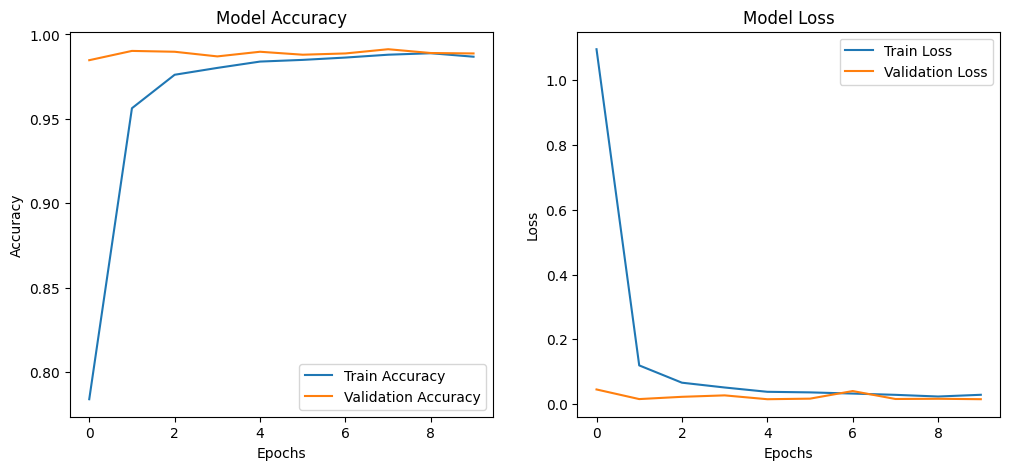

In [73]:
# Visualization of training process
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [74]:
# Load the trained model for evaluation
model = load_model("gesture_model.h5")

In [75]:
# Model evaluation
y_true = []
y_pred = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━

In [76]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

          00       1.00      1.00      1.00       403
          01       1.00      1.00      1.00       390
          02       0.90      1.00      0.95       408
          03       1.00      1.00      1.00       388
          04       1.00      1.00      1.00       367
          05       1.00      0.89      0.94       423
          06       1.00      1.00      1.00       400
          07       1.00      1.00      1.00       378
          08       1.00      1.00      1.00       396
          09       1.00      1.00      1.00       447

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



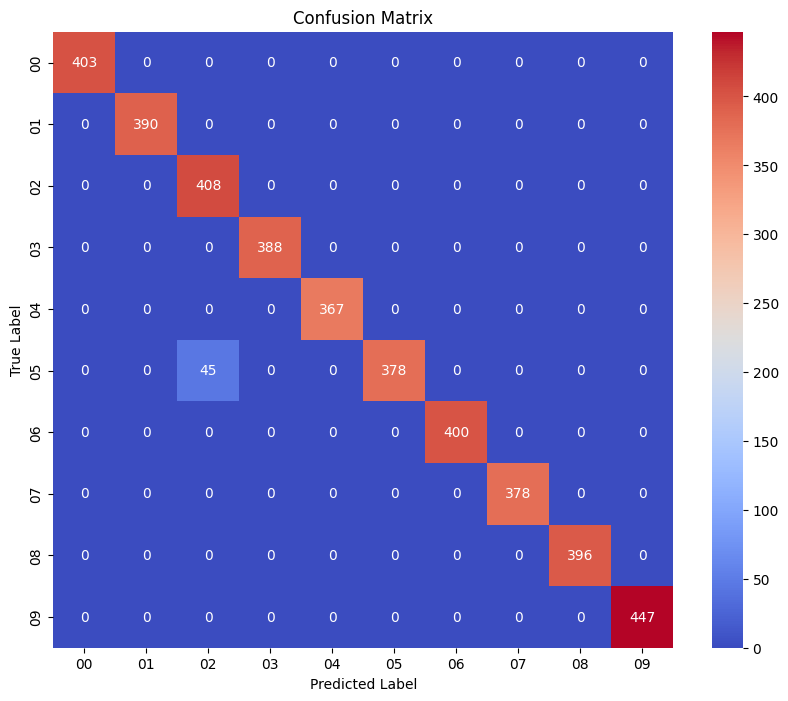

In [77]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def start_camera():
    cap = cv2.VideoCapture(0)
    print("Press 'q' to close the camera.")
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Preprocess the frame
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0  # Normalize
        img = np.expand_dims(img, axis=0) 
        # Predict the gesture
        predictions = model.predict(img)
        class_index = np.argmax(predictions)
        class_name = class_names[class_index]
        confidence = predictions[0][class_index] * 100
        # Load the corresponding gesture image
        gesture_image_path = f"path/to/gesture_images/{class_name}.jpg"  # Ensure gesture images are named accordingly
        gesture_image = cv2.imread(gesture_image_path)
        h, w = 0, 0  # Default values in case image is not found
        if gesture_image is not None:
            gesture_image = cv2.resize(gesture_image, (200, 200))  # Resize to fit overlay
            h, w, _ = gesture_image.shape
            frame[10:10+h, 10:10+w] = gesture_image  # Overlay gesture image on camera feed
        text = f"{class_name} ({confidence:.2f}%)"
        text_y = 10 + h + 30 if h > 0 else 50  # Adjust text position dynamically
        cv2.putText(frame, text, (10, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Hand Gesture Recognition", frame)
        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
# Run the camera
start_camera()

Press 'q' to close the camera.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━